In [1]:
# Установка необходимых библиотек
!pip install scrapy nest_asyncio nltk matplotlib pymystem3 pandas

# Импорт библиотек
import scrapy
from scrapy.crawler import CrawlerProcess
from collections import Counter
import re
import nest_asyncio
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from pymystem3 import Mystem
import pandas as pd

# Разрешение вложенных событийных циклов
nest_asyncio.apply()

In [2]:
# Скачивание стоп-слов для русского языка
nltk.download('stopwords')
stop_words = set(stopwords.words('russian'))

# Инициализация морфологического анализатора
mystem = Mystem()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
class WikiSpider(scrapy.Spider):
    name = "wiki_spider"
    start_urls = ['https://ru.wikipedia.org/wiki/Информационная_безопасность']
    custom_settings = {
        'ROBOTSTXT_OBEY': True,
        'DOWNLOAD_DELAY': 1,
        'USER_AGENT': 'MyBot (example@example.com)'
    }

    def parse(self, response):
        # Извлечение текста из параграфов
        paragraphs = response.css('p::text').getall()
        text = ' '.join(paragraphs)
        # Передаём текст для обработки
        self.process_text(text)

    def process_text(self, text):
        # Очистка текста
        words = re.findall(r'\b\w+\b', text.lower())
        # Фильтрация стоп-слов и лемматизация
        filtered_lemmas = [mystem.lemmatize(word)[0] for word in words if word not in stop_words]
        # Подсчёт частоты лемм
        lemma_counts = Counter(filtered_lemmas)
        # Сохранение в CSV
        self.save_to_csv(lemma_counts)

    def save_to_csv(self, lemma_counts):
        # Создание DataFrame из подсчёта лемм
        df = pd.DataFrame(lemma_counts.items(), columns=['Lemma', 'Frequency'])
        # Сортировка по убыванию частоты
        df = df.sort_values(by='Frequency', ascending=False)
        # Сохранение в CSV
        df.to_csv('word_frequencies.csv', index=False, encoding='utf-8')
        print("Датасет сохранён в word_frequencies.csv")

In [5]:
# Запуск паука
process = CrawlerProcess()
process.crawl(WikiSpider)
process.start()

INFO:scrapy.utils.log:Scrapy 2.13.0 started (bot: scrapybot)
2025-05-27 01:39:12 [scrapy.utils.log] INFO: Scrapy 2.13.0 started (bot: scrapybot)
INFO:scrapy.utils.log:Versions:
{'lxml': '5.4.0',
 'libxml2': '2.13.8',
 'cssselect': '1.3.0',
 'parsel': '1.10.0',
 'w3lib': '2.3.1',
 'Twisted': '24.11.0',
 'Python': '3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]',
 'pyOpenSSL': '24.2.1 (OpenSSL 3.3.2 3 Sep 2024)',
 'cryptography': '43.0.3',
 'Platform': 'Linux-6.1.123+-x86_64-with-glibc2.35'}
2025-05-27 01:39:12 [scrapy.utils.log] INFO: Versions:
{'lxml': '5.4.0',
 'libxml2': '2.13.8',
 'cssselect': '1.3.0',
 'parsel': '1.10.0',
 'w3lib': '2.3.1',
 'Twisted': '24.11.0',
 'Python': '3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]',
 'pyOpenSSL': '24.2.1 (OpenSSL 3.3.2 3 Sep 2024)',
 'cryptography': '43.0.3',
 'Platform': 'Linux-6.1.123+-x86_64-with-glibc2.35'}
INFO:scrapy.addons:Enabled addons:
[]
2025-05-27 01:39:12 [scrapy.addons] INFO: Enabled addons:
[]
DEBUG:scrapy.utils.log:Us

Датасет сохранён в word_frequencies.csv


In [7]:
!cat word_frequencies.csv

Lemma,Frequency
безопасность,71
информация,60
информационный,52
организация,39
защита,39
который,37
год,28
система,24
должный,18
данный,18
документ,18
политика,15
такой,15
обеспечение,14
либо,14
средство,14
она,13
компьютерный,13
например,13
мера,13
свой,13
являться,13
это,12
целостность,12
процедура,12
конфиденциальность,11
изменение,10
любой,10
стандарт,10
принцип,10
требование,10
деятельность,9
технический,9
правило,9
лицо,9
контроль,9
доступность,9
основной,9
риск,9
управление,9
также,9
технология,8
доступ,8
профессиональный,8
процесс,8
данные,8
конфиденциальный,8
состояние,8
один,8
становиться,7
угроза,7
результат,7
появляться,7
пользователь,7
уровень,7
получать,7
сообщение,7
область,7
организационный,7
позволять,7
секретный,7
определять,7
мочь,7
оценка,7
время,7
отказ,6
случай,6
подобный,6
иной,6
шифрование,6
этот,6
предприятие,6
какой,6
программа,6
триада,6
обычно,6
использовать,6
использование,6
действие,6
сторона,6
нарушение,6
важный,6
возникать,6
все,6
международный,5
задача,

In [9]:
df = pd.read_csv('word_frequencies.csv')
# Получение топ-10 лемм
top_10 = df[['Lemma', 'Frequency']].head(10).values.tolist()

# Вывод топ-10 лемм
print("\nТоп-10 часто встречаемых лемм:")
for lemma, freq in top_10:
    print(f"{lemma}: {freq}")


Топ-10 часто встречаемых лемм:
безопасность: 71
информация: 60
информационный: 52
организация: 39
защита: 39
который: 37
год: 28
система: 24
должный: 18
данный: 18


DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2025-05-27 01:41:03 [matplotlib.font_manager] DEBUG: findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/local/lib/python3.11/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerifDisplay.ttf', name='DejaVu Serif Display', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2025-05-27 01:41:03 [matplotlib.font_manager] DEBUG: findfont: score(FontEntry(fname='/usr/local/lib/python3.11/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerifDisplay.ttf', name='DejaVu Serif Display', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/local/lib/python3.11/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSan

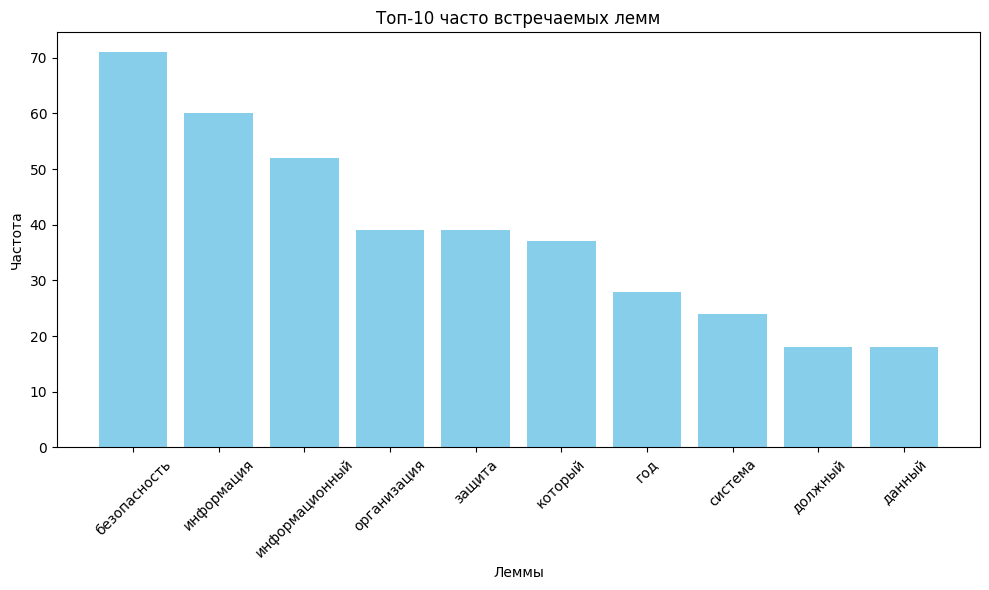

In [10]:
# Визуализация
lemmas, frequencies = zip(*top_10)
plt.figure(figsize=(10, 6))
plt.bar(lemmas, frequencies, color='skyblue')
plt.xlabel('Леммы')
plt.ylabel('Частота')
plt.title('Топ-10 часто встречаемых лемм')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()